In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('temperature - temperature.csv')

In [5]:
df.columns

Index(['Date', 'temperature'], dtype='object')

In [6]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv')

In [7]:
type(rain["Date"])

pandas.core.series.Series

In [8]:
type(df["Date"])

pandas.core.series.Series

In [9]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [10]:
rain["Date"] = pd.to_datetime(rain["Date"], format='%d-%m-%Y')

In [11]:
rain["Date"] = pd.to_datetime(rain["Date"], format='%m-%d-%Y')

In [12]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


In [13]:
df.head()

,Date,temperature
0,01-01-1995,72.4
1,01-02-1995,73.5
2,01-03-1995,72.6
3,01-04-1995,75.2
4,01-05-1995,74.8


In [14]:
df["Date"] = pd.to_datetime(df["Date"], format='%m-%d-%Y')

In [15]:
df.head()

,Date,temperature
0,1995-01-01,72.4
1,1995-01-02,73.5
2,1995-01-03,72.6
3,1995-01-04,75.2
4,1995-01-05,74.8


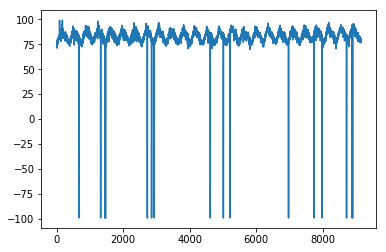

In [16]:
df.temperature.plot()

In [17]:
df.loc[df['temperature'] < 0]

,Date,temperature
664,1996-10-26,-99.0
1323,1998-08-16,-99.0
1453,1998-12-24,-99.0
1454,1998-12-25,-99.0
1459,1998-12-30,-99.0
1460,1998-12-31,-99.0
1470,1999-01-10,-99.0
2725,2002-06-18,-99.0
2726,2002-06-19,-99.0
2727,2002-06-20,-99.0


In [18]:
idx = df.loc[df["temperature"] < 0].index

In [19]:
for i in range(-4,5):
    print(df.iloc[idx[0] + i]['temperature'])

82.9
82.1
79.6
84.3
-99.0
83.7
81.0
82.0
81.4


In [20]:
idx = df.loc[df['temperature'] < 0].index

In [21]:
for i in idx:
    if df.iloc[i+1][1] > 0:
        df.iloc[i,1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1]) / 2
    else:
        df.iloc[i,1] = (df.iloc[i-1, 1])

In [22]:
# for i in idx:
#     for j in range(-4,5):
#         print(df.iloc[i + j]['temperature'])

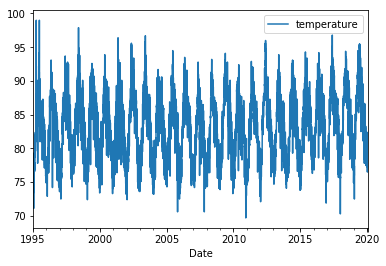

In [23]:
df.plot(x='Date')

In [24]:
df.describe()

,temperature
count,9158.000000
mean,83.407043
std,4.730817
min,69.700000
25%,79.400000
50%,83.800000
75%,87.000000
max,99.000000


In [25]:
df.loc[df['temperature'] >= 99]

,Date,temperature
87,1995-03-29,99.0
172,1995-06-22,99.0


In [26]:
idx = df.loc[df['temperature'] >= 99].index

In [27]:
for i in range(-4,5):
    print(df.iloc[87 + i]['temperature'])

84.0
84.2
82.6
84.2
99.0
85.1
84.3
84.7
84.6


In [28]:
for i in range(-4,5):
    print(df.iloc[172 + i]['temperature'])

89.7
89.9
91.3
86.5
99.0
84.1
85.6
85.1
87.4


In [29]:
for i in idx:
    if df.iloc[i+1][1] < 99:
        df.iloc[i,1] = (df.iloc[i-1, 1] + df.iloc[i+1, 1]) / 2
    else:
        df.iloc[i,1] = (df.iloc[i-1, 1])

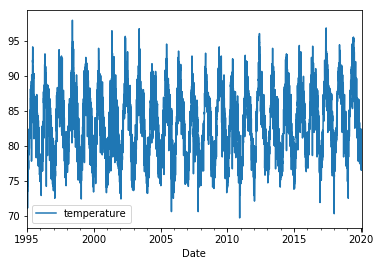

In [30]:
df.plot(x='Date')

In [31]:
df.describe()

,temperature
count,9158.00000
mean,83.40398
std,4.72526
min,69.70000
25%,79.40000
50%,83.80000
75%,87.00000
max,97.90000


In [32]:
idx = df.loc[df['temperature'] == max(df["temperature"])].index

In [33]:
for i in range(-4,5):
    print(df.loc[idx + i])

           Date  temperature
1239 1998-05-24         93.8
           Date  temperature
1240 1998-05-25         93.1
           Date  temperature
1241 1998-05-26         94.0
           Date  temperature
1242 1998-05-27         97.8
           Date  temperature
1243 1998-05-28         97.9
           Date  temperature
1244 1998-05-29         96.1
           Date  temperature
1245 1998-05-30         92.6
           Date  temperature
1246 1998-05-31         92.5
           Date  temperature
1247 1998-06-01         91.4


In [34]:
df.shape

(9158, 2)

In [35]:
dff = df.temperature

In [36]:
df.to_csv('processed-temperature.csv')

In [37]:
from pandas.plotting import lag_plot

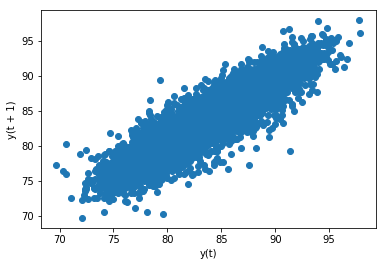

In [38]:
lag_plot(df['temperature'])

In [39]:
df.values

array([[Timestamp('1995-01-01 00:00:00'), 72.4],
       [Timestamp('1995-01-02 00:00:00'), 73.5],
       [Timestamp('1995-01-03 00:00:00'), 72.6],
       ...,
       [Timestamp('2020-01-25 00:00:00'), 76.8],
       [Timestamp('2020-01-26 00:00:00'), 78.7],
       [Timestamp('2020-01-27 00:00:00'), 80.0]], dtype=object)

In [40]:
dataframe = pd.concat([df['temperature'].shift(1), df.temperature], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.933585
t+1  0.933585  1.000000


In [41]:
from pandas.plotting import autocorrelation_plot

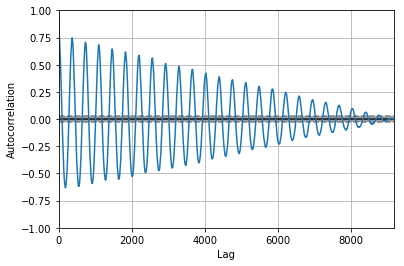

In [42]:
autocorrelation_plot(df['temperature'])

In [43]:
wl = pd.read_csv('chennai_reservoir_levels.csv')

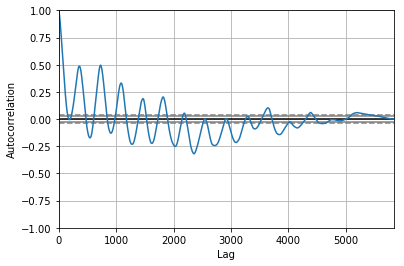

In [44]:
autocorrelation_plot(wl['CHOLAVARAM'])

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.98145422, 0.98393337, 0.98626057, 0.98841518, 0.9903979 ,
        0.99221822, 0.99384892, 0.99529025, 0.99674806, 0.99788681,
        1.        , 0.99788681, 0.99674806, 0.99529025, 0.99384892,
        0.99221822, 0.9903979 , 0.98841518, 0.98626057, 0.98393337,
        0.98145422]),
 <matplotlib.lines.Line2D at 0x7f789c6f58d0>)

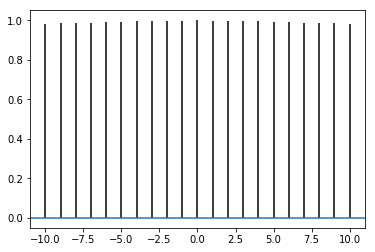

In [45]:
plt.acorr(wl['CHOLAVARAM'])

In [46]:
# autocorrelation_plot?

In [47]:
import keras

Using TensorFlow backend.


In [48]:
from keras import layers

In [49]:
from keras import Sequential

In [50]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.LSTM(128))

model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [51]:
# model.fit?

In [52]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv')

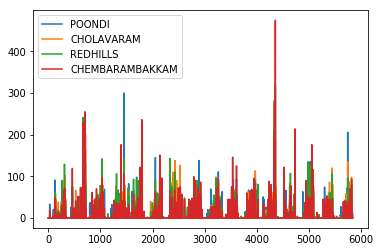

In [53]:
rain.plot()

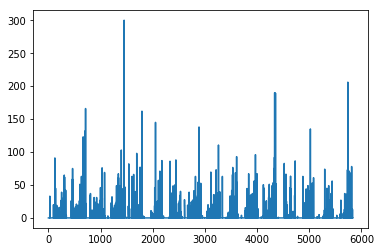

In [54]:
plt.plot(rain['POONDI'])

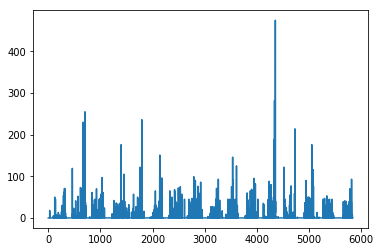

In [55]:
plt.plot(rain['CHEMBARAMBAKKAM'])

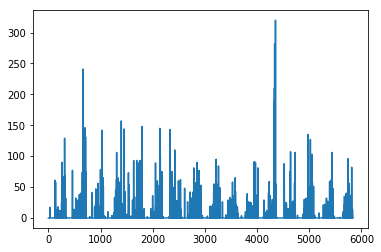

In [56]:
plt.plot(rain['REDHILLS'])

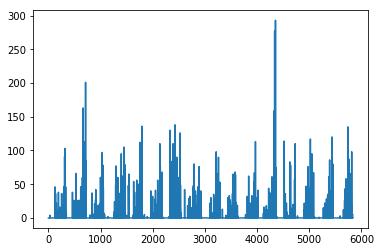

In [57]:
plt.plot(rain['CHOLAVARAM'])

In [58]:
values = pd.DataFrame(df['temperature'].values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-300], X[len(X)-300:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [59]:
# values = pd.DataFrame(df['temperature'].values)

In [60]:
train_X

array([72.4, 73.5, 72.6, ..., 87.8, 89.3, 88.2])

In [61]:
import keras

In [62]:
from keras import layers

In [63]:
from keras import Sequential

In [64]:
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [65]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.SimpleRNN(32))

model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 67,137
Trainable params: 67,137
Non-trainable params: 0
_________________________________________________________________


In [66]:
#series.shape

In [67]:
x = train_X

In [68]:
y = train_y

In [69]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(x, y, epochs=60, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
8857/8857 [==============================] - 2s 172us/step - loss: 6127.4494 - acc: 0.0000e+00
Epoch 2/60
8857/8857 [==============================] - 1s 61us/step - loss: 4545.1988 - acc: 0.0000e+00
Epoch 3/60
8857/8857 [==============================] - 1s 61us/step - loss: 3826.0662 - acc: 0.0000e+00
Epoch 4/60
8857/8857 [==============================] - 1s 65us/step - loss: 3263.1385 - acc: 0.0000e+00
Epoch 5/60
8857/8857 [==============================] - 1s 63us/step - loss: 2783.2756 - acc: 0.0000e+00
Epoch 6/60
8857/8857 [==============================] - 1s 66us/step - loss: 2366.3258 - acc: 0.0000e+00
Epoch 7/60
8857/8857 [==============================] - 1s 62us/step - loss: 2002.1872 - acc: 0.0000e+00
Epoch 8/60
8857/8857 [==============================] - 1s 63us/step - loss: 1684.1678 - acc: 0.0000e+00
Epoch 9/60
8857/8857 [==============================] - 1s 63us/step - loss: 1407.1282 - acc: 0.0000e+00
Epoch 

In [71]:
test_Res = model.predict(test_X)

In [72]:
mean_squared_error(test_Res, test_y)

4.639489422980625

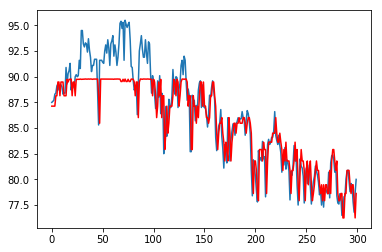

In [73]:
plt.plot(test_y)
plt.plot(test_Res, color='red')
plt.show()

In [74]:
model1 = Sequential()

model1.add(layers.Embedding(input_dim=1000, output_dim=64))

model1.add(layers.LSTM(64))

model1.add(layers.Dense(1))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [75]:
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [76]:
model1.fit(x, y, epochs=20, batch_size=64)

Epoch 1/20
8857/8857 [==============================] - 2s 188us/step - loss: 6190.7258 - acc: 0.0000e+00
Epoch 2/20
8857/8857 [==============================] - 1s 100us/step - loss: 3729.0612 - acc: 0.0000e+00
Epoch 3/20
8857/8857 [==============================] - 1s 97us/step - loss: 2799.5858 - acc: 0.0000e+00
Epoch 4/20
8857/8857 [==============================] - 1s 97us/step - loss: 2130.3403 - acc: 0.0000e+00
Epoch 5/20
8857/8857 [==============================] - 1s 98us/step - loss: 1610.4177 - acc: 0.0000e+00
Epoch 6/20
8857/8857 [==============================] - 1s 100us/step - loss: 1202.5371 - acc: 0.0000e+00
Epoch 7/20
8857/8857 [==============================] - 1s 99us/step - loss: 884.3247 - acc: 0.0000e+00
Epoch 8/20
8857/8857 [==============================] - 1s 98us/step - loss: 639.2296 - acc: 0.0000e+00
Epoch 9/20
8857/8857 [==============================] - 1s 97us/step - loss: 453.5379 - acc: 0.0000e+00
Epoch 10/20
8857/8857 [==============================] 

In [77]:
test_LS = model1.predict(test_X)

In [78]:
mean_squared_error(test_LS, test_y)

37.385643162991194

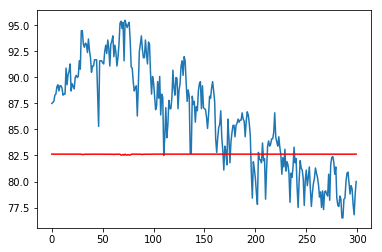

In [79]:
plt.plot(test_y)
plt.plot(test_LS, color='red')
plt.show()

In [80]:
values = pd.DataFrame(wl['CHOLAVARAM'].values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-300], X[len(X)-300:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [81]:
model1 = Sequential()

model1.add(layers.Embedding(input_dim=1000, output_dim=64))

model1.add(layers.LSTM(64))

model1.add(layers.Dense(1))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [82]:
model1.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

In [83]:
model1.fit(train_X, train_y, epochs=40, batch_size=64)

Epoch 1/40
5535/5535 [==============================] - 1s 161us/step - loss: 244.0788 - acc: 0.2020
Epoch 2/40
5535/5535 [==============================] - 0s 52us/step - loss: 239.0950 - acc: 0.2092
Epoch 3/40
5535/5535 [==============================] - 0s 51us/step - loss: 228.8338 - acc: 0.2121
Epoch 4/40
5535/5535 [==============================] - 0s 51us/step - loss: 221.3015 - acc: 0.2136
Epoch 5/40
5535/5535 [==============================] - 0s 51us/step - loss: 216.2971 - acc: 0.2166
Epoch 6/40
5535/5535 [==============================] - 0s 48us/step - loss: 212.4158 - acc: 0.2114
Epoch 7/40
5535/5535 [==============================] - 0s 48us/step - loss: 208.9851 - acc: 0.2145
Epoch 8/40
5535/5535 [==============================] - 0s 49us/step - loss: 206.1118 - acc: 0.2101
Epoch 9/40
5535/5535 [==============================] - 0s 52us/step - loss: 203.4606 - acc: 0.2002
Epoch 10/40
5535/5535 [==============================] - 0s 51us/step - loss: 200.9215 - acc: 0.196

In [84]:
test_LS = model1.predict(test_X)

In [85]:
mean_squared_error(test_LS, test_y)

928.4893504803189

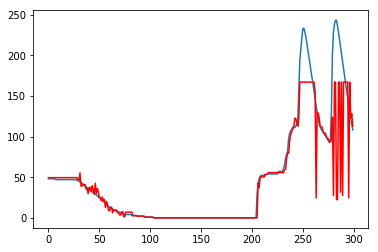

In [86]:
plt.plot(test_y)
plt.plot(test_LS, color='red')
plt.show()

In [87]:
df.Date

0      1995-01-01
1      1995-01-02
2      1995-01-03
3      1995-01-04
4      1995-01-05
          ...    
9153   2020-01-23
9154   2020-01-24
9155   2020-01-25
9156   2020-01-26
9157   2020-01-27
Name: Date, Length: 9158, dtype: datetime64[ns]

In [88]:
rain.Date = pd.to_datetime(rain.Date)

In [89]:
wl.Date = pd.to_datetime(wl.Date)

In [90]:
df[df.Date == '2004-01-01']

,Date,temperature
3287,2004-01-01,76.9


In [91]:
TMP = df.loc[3287:]

In [92]:
TMP[TMP.Date == '2019-12-23']

,Date,temperature
9122,2019-12-23,79.0


In [93]:
TMP = TMP.loc[:9122]

In [94]:
TMP.index

RangeIndex(start=3287, stop=9123, step=1)

In [95]:
pd.RangeIndex

pandas.core.indexes.range.RangeIndex

In [96]:
TMP.shape

(5836, 2)

In [97]:
TMP.index = TMP.Date

In [98]:
TMP.drop(['Date'], axis=1, inplace=True)

In [99]:
rain = rain.set_index('Date')

In [100]:
wl = wl.set_index('Date')

In [101]:
train_REDHILLS = pd.concat((TMP, rain['REDHILLS'], wl['REDHILLS']), axis=1)

In [102]:
train_REDHILLS.head()

,temperature,REDHILLS,REDHILLS
Date,,,
2004-01-01,76.9,0.0,268.0
2004-01-02,75.1,0.0,220.0
2004-01-03,74.3,0.0,153.0
2004-01-04,75.6,0.0,190.0
2004-01-05,76.3,0.0,151.3


In [103]:
column_names=['temperature', 'rainfall', 'water level']

In [104]:
train_REDHILLS.columns = column_names

In [105]:
train_REDHILLS.head()

,temperature,rainfall,water level
Date,,,
2004-01-01,76.9,0.0,268.0
2004-01-02,75.1,0.0,220.0
2004-01-03,74.3,0.0,153.0
2004-01-04,75.6,0.0,190.0
2004-01-05,76.3,0.0,151.3


In [106]:
train_REDHILLS.head()

,temperature,rainfall,water level
Date,,,
2004-01-01,76.9,0.0,268.0
2004-01-02,75.1,0.0,220.0
2004-01-03,74.3,0.0,153.0
2004-01-04,75.6,0.0,190.0
2004-01-05,76.3,0.0,151.3


In [107]:
def create_sequences(x, interval):
    input_seq = []
    l = len(x)
    for i in range(l-interval):
        train_seq = x[i:i+interval]
        train_label = x[i+interval]
        input_seq.append((train_seq, train_label))
    return input_seq

In [108]:
np.append(X, X).shape

(23344,)

In [109]:
def create_sequences(x, interval):
    input_seq = []
    output_seq = [] 
    l = len(x)
    for i in range(l-interval):
        train_seq = x[i:i+interval]
        train_label = x[i+interval][-1]
        input_seq.append(train_seq)
        output_seq.append(train_label)
    return np.array(input_seq), np.array(output_seq)

In [110]:
REDHILLS_seq = create_sequences(np.array(train_REDHILLS.values), 14)

In [111]:
X, y = REDHILLS_seq

In [112]:
X.shape

(5822, 14, 3)

In [113]:
y = y.reshape(y.shape[0], 1)

In [114]:
# from sklearn.preprocessing import MinMaxScaler

In [115]:
# scaler = MinMaxScaler(feature_range=(-1, 1))
# train_data.temperature = scaler.fit_transform(train_data.temperature.values.reshape(-1,1))

In [116]:
train_X, test_X = X[:len(X)-300], X[len(X)-300:]
train_y, test_y = y[:len(X)-300], y[len(X)-300:]

In [117]:
train.shape

(5535, 2)

In [119]:
model1 = Sequential()
# model1.add(layers.LSTM(64, input_shape=(14, 3)))
model1.add(layers.Bidirectional(layers.LSTM(128, input_shape=(14, 3))))
model1.add(layers.Dense(1))

In [120]:
model1.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

In [121]:
# train_X.shape

In [122]:
# train_X.shape

In [123]:
# train_X_r = train_X.reshape(5521, 14)

In [124]:
train_y.shape

(5522, 1)

In [125]:
train_X.shape

(5522, 14, 3)

In [126]:
model1.fit(train_X, train_y, epochs=100, batch_size=64)

Epoch 1/100
5522/5522 [==============================] - 3s 525us/step - loss: 1590.9992 - acc: 0.0013
Epoch 2/100
5522/5522 [==============================] - 2s 345us/step - loss: 1573.7149 - acc: 7.2438e-04
Epoch 3/100
5522/5522 [==============================] - 2s 352us/step - loss: 1558.2413 - acc: 0.0024
Epoch 4/100
5522/5522 [==============================] - 2s 362us/step - loss: 1544.2212 - acc: 0.0020
Epoch 5/100
5522/5522 [==============================] - 2s 366us/step - loss: 1531.0461 - acc: 0.0024
Epoch 6/100
5522/5522 [==============================] - 2s 368us/step - loss: 1518.3948 - acc: 0.0020
Epoch 7/100
5522/5522 [==============================] - 2s 383us/step - loss: 1505.7023 - acc: 0.0027
Epoch 8/100
5522/5522 [==============================] - 2s 365us/step - loss: 1493.3355 - acc: 0.0031
Epoch 9/100
5522/5522 [==============================] - 2s 372us/step - loss: 1481.4092 - acc: 0.0029
Epoch 10/100
5522/5522 [==============================] - 2s 376us/st

5522/5522 [==============================] - 2s 384us/step - loss: 817.5304 - acc: 0.0025
Epoch 81/100
5522/5522 [==============================] - 2s 385us/step - loss: 808.3862 - acc: 0.0020
Epoch 82/100
5522/5522 [==============================] - 2s 381us/step - loss: 799.2419 - acc: 0.0038
Epoch 83/100
5522/5522 [==============================] - 2s 373us/step - loss: 791.3115 - acc: 0.0020
Epoch 84/100
5522/5522 [==============================] - 2s 372us/step - loss: 782.7382 - acc: 0.0014
Epoch 85/100
5522/5522 [==============================] - 2s 372us/step - loss: 774.5610 - acc: 0.0022
Epoch 86/100
5522/5522 [==============================] - 2s 376us/step - loss: 766.0449 - acc: 0.0029
Epoch 87/100
5522/5522 [==============================] - 2s 369us/step - loss: 757.8227 - acc: 0.0022
Epoch 88/100
5522/5522 [==============================] - 2s 370us/step - loss: 750.4195 - acc: 0.0014
Epoch 89/100
5522/5522 [==============================] - 2s 400us/step - loss: 742.84

In [127]:
test_LS = model1.predict(test_X)

In [128]:
test_y.shape

(300, 1)

In [129]:
mean_squared_error(test_LS, test_y)

180381.91421507456

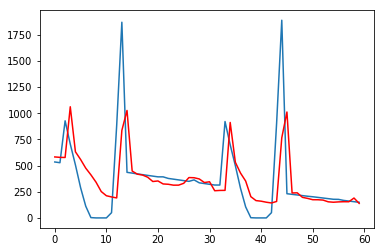

In [130]:
plt.plot(test_y[:60])
plt.plot(test_LS[:60], color='red')
plt.show()

In [166]:
import datetime

In [133]:
def LSTM_model():
    model = Sequential()
    model.add(layers.LSTM(128, input_shape=(14, 3), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(3)) # size of output features
    model.compile(optimizer='Adam',loss='mae',metrics=['accuracy'])
    return model

In [134]:
def create_sequences_full(x, interval):
    input_seq = []
    output_seq = [] 
    l = len(x)
    for i in range(l-interval):
        train_seq = x[i:i+interval]
        train_label = x[i+interval]
        input_seq.append(train_seq)
        output_seq.append(train_label)
    return np.array(input_seq), np.array(output_seq)

In [149]:
# model.fit(train_X, train_y)
results = []
last = test_X[-1]
for i in range(30):
    y_pred = model1.predict(last.reshape(1, 14, 3))
    last = np.vstack((last[1:], y_pred)    
    results.append(y_pred[-1])

In [179]:
base = rain.index[-1]
date_list = [base - datetime.timedelta(days=x) for x in range(30)]

rf = pd.DataFrame({'Date':date_list, 'result':results})
rf.columns = ['Date', 'REDHILLS']


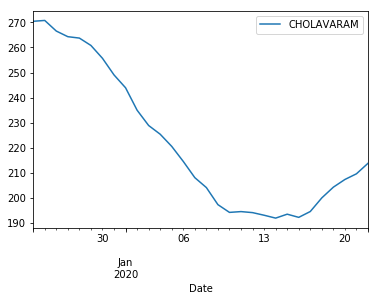

In [131]:
rf.plot(x='Date', y='CHOLAVARAM')